## Basic ML pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading

Импорт данных

In [2]:
df = pd.read_csv('C:/Users/Владимир/Desktop/california-house-prices23/housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-116.46,33.82,6.0,4863.0,920.0,3010.0,828.0,3.9508,104200.0,INLAND
1,-117.04,34.00,21.0,4624.0,852.0,2174.0,812.0,3.5255,132100.0,INLAND
2,-121.03,37.55,32.0,946.0,198.0,624.0,173.0,1.9728,97900.0,INLAND
3,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
4,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,2.6768,182300.0,NEAR BAY


### Exploratory Data Analysis (EDA)

Оценка размера датасета

In [3]:
df.shape

(14448, 10)

Поиск пропущенных значений

In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        138
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Решаем проблему пропусков одним из способов:
* выкидываем строки
* выкидываем признак
* заполняем стредним/медианой/специальным значением
* строим модель заполнения пропусков
* строить несколько моделей - с учетом признака и без учета признака

Для базовой модели пойдем самым простым путем

In [5]:
df = df[df.total_bedrooms.isnull() == False]

In [6]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Проверка на однородность типов данных

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
df.median_house_value = np.log(df.median_house_value)
df.median_income = np.log(df.median_income)
#df.total_bedrooms = np.log(df.total_bedrooms)
#df.population = np.log(df.population)
#df.households = np.log(df.households)

Изучим категориальный признак

In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     6351
INLAND        4509
NEAR OCEAN    1860
NEAR BAY      1586
ISLAND           4
Name: ocean_proximity, dtype: int64

Немного упрощаем задачу

In [10]:
df.loc[df.ocean_proximity == 'ISLAND', 'ocean_proximity'] = 'NEAR OCEAN'

Переводим категориальные признаки в числовые

In [11]:
df = pd.get_dummies(df, columns=["ocean_proximity"])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-116.46,33.82,6.0,4863.0,920.0,3010.0,828.0,1.373918,11.554067,0,1,0,0
1,-117.04,34.00,21.0,4624.0,852.0,2174.0,812.0,1.260022,11.791314,0,1,0,0
2,-121.03,37.55,32.0,946.0,198.0,624.0,173.0,0.679454,11.491702,0,1,0,0
3,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,1.933447,12.521248,1,0,0,0
4,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,0.984622,12.113409,0,0,1,0


Изучаем статистику и распределение числовых признаков

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000
mean,-119.577593,35.634841,28.559469,2654.236129,541.574843,1435.005451,502.839553,1.245707,12.088446,0.443816,0.315094,0.110832,0.130259
std,2.005735,2.136900,12.564408,2219.639505,426.572305,1117.746438,386.807167,0.470908,0.568381,0.496851,0.464570,0.313934,0.336599
min,-124.350000,32.550000,1.000000,6.000000,1.000000,3.000000,1.000000,-0.693347,9.615739,0.000000,0.000000,0.000000,0.000000
25%,-121.810000,33.930000,18.000000,1456.000000,297.000000,789.000000,281.000000,0.940983,11.701063,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.250000,29.000000,2133.500000,438.000000,1170.500000,412.000000,1.263632,12.102377,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3150.000000,650.000000,1739.000000,607.000000,1.559591,12.488899,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,2.708057,13.122365,1.000000,1.000000,1.000000,1.000000


На этом этапе полезно сопоставлять распределения признаков и априорные знания о признаках. Например, мы не ожидаем увидеть отрицательных чисел среди таки признаков, как total_rooms, population и т.п. При обнаружении значений, которые выходят за естественные пределы - с ними можно работать так же, как с пропущенными значениями.

Оцениваем распределения признаков

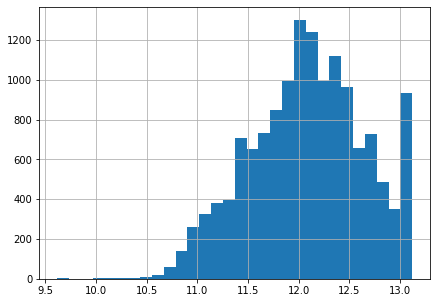

In [13]:
fig = plt.figure(figsize=(7, 5))
fig.patch.set_facecolor('xkcd:white')
df.median_house_value.hist(bins=30)
plt.show()

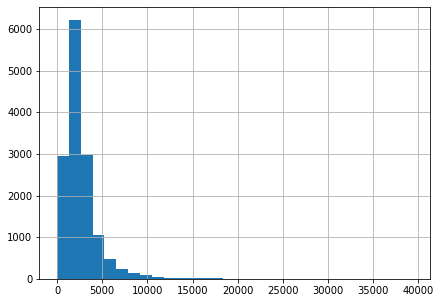

In [14]:
fig = plt.figure(figsize=(7, 5))
fig.patch.set_facecolor('xkcd:white')
df.total_rooms.hist(bins=30)
plt.show()

Карта распределения домов (как идея для дополнительного признака - поиск кластеров)

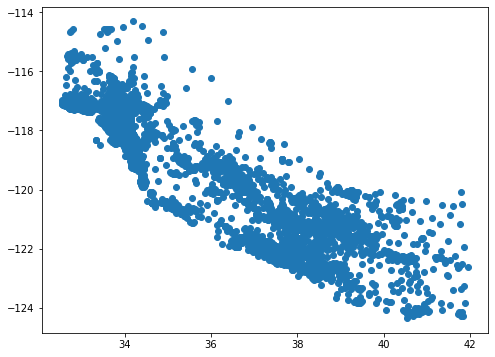

In [15]:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('xkcd:white')
plt.scatter(df.latitude, df.longitude)
plt.show()

Связь расположения и стоимости

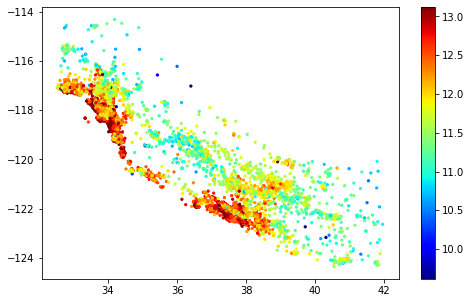

In [16]:
fig = plt.figure(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
plt.scatter(df.latitude, df.longitude, c=df.median_house_value,
            cmap="jet", s=5)
plt.colorbar()
plt.show()

Распределение категориальных признаков на карте

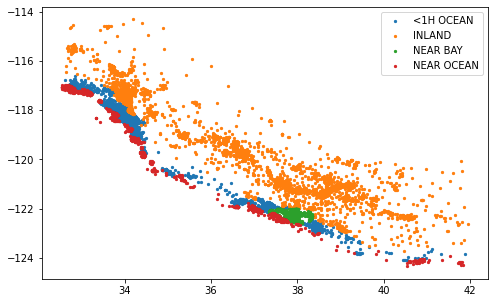

In [17]:
fig = plt.figure(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
for cat in ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
            'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']:
    plt.scatter(*df.loc[df[cat]==1, ['latitude', 'longitude']].values.T,
                label=cat.split('_')[-1], s=5)
plt.legend()
plt.show()

Перекрестные корреляции

C:\Users\18EE~1\AppData\Local\Temp/ipykernel_3456/2914554265.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df[cols], ax=ax)


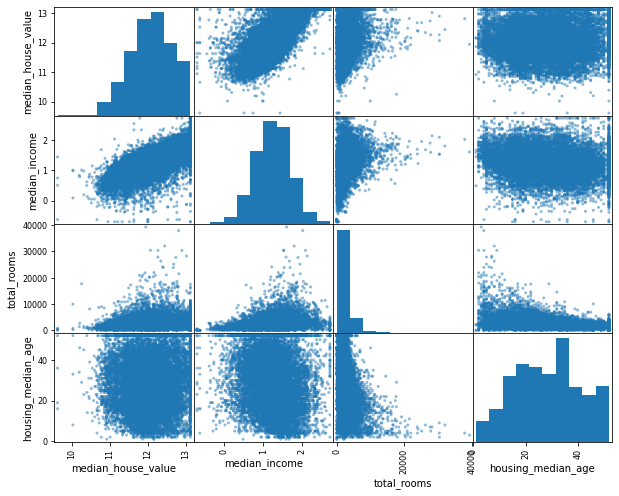

In [18]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('xkcd:white')

cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[cols], ax=ax)
plt.show()

### Feature Engeneering

Составляем новые признаки

In [19]:
df['rooms_per_household'] = df.total_rooms / df.households
df['people_per_household'] = df.population / df.households

Снова изучаем корреляции

C:\Users\18EE~1\AppData\Local\Temp/ipykernel_3456/3352461217.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df[feat], ax=ax)


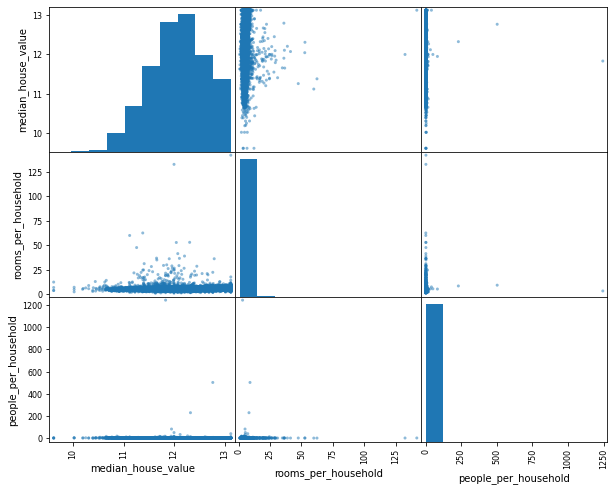

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('xkcd:white')

feat = ['median_house_value','rooms_per_household','people_per_household']
scatter_matrix(df[feat], ax=ax)
plt.show()

Видим проблему - аномальные значения

In [21]:
df.rooms_per_household.max(), df.people_per_household.max()

(141.9090909090909, 1243.3333333333333)

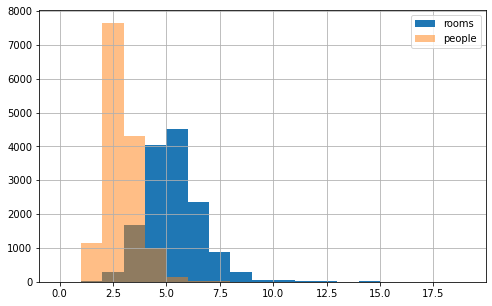

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
df.rooms_per_household.hist(bins=np.arange(20), label='rooms')
df.people_per_household.hist(bins=np.arange(20), label='people', alpha=0.5)
plt.legend()
plt.show()

Убираем выбросы

In [23]:
df.rooms_per_household = df.rooms_per_household.clip(0, 20)
df.people_per_household = df.people_per_household.clip(0, 10)

Снова изучаем корреляции

C:\Users\18EE~1\AppData\Local\Temp/ipykernel_3456/1770237062.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df[feat],ax=ax)


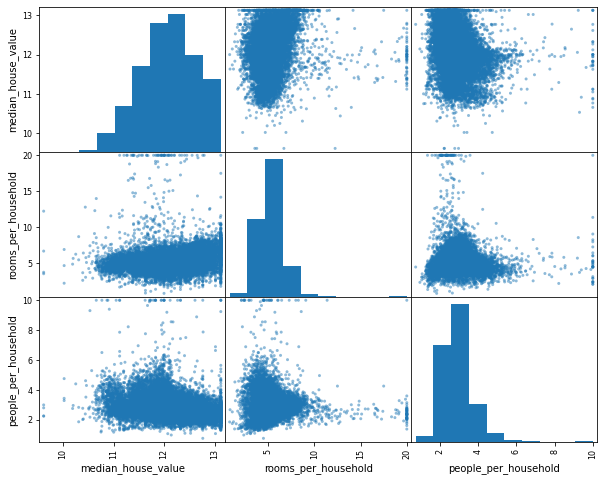

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('xkcd:white')

feat = ['median_house_value','rooms_per_household','people_per_household']
scatter_matrix(df[feat],ax=ax)
plt.show()

In [25]:
#df['rooms_per_household'] = df.total_rooms / df.households
#df['people_per_household'] = df.population / df.households
#ввели переменную посмотрели графики распредлений убрали некоторые значения, посмотрели еще раз

In [26]:
df['ocean_proximity_<1H OCEAN'].astype('float64')
df['ocean_proximity_INLAND'].astype('float64')
df['ocean_proximity_NEAR BAY'].astype('float64')
df['ocean_proximity_NEAR OCEAN'].astype('float64')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14442    0.0
14444    0.0
14445    0.0
14446    0.0
14447    0.0
Name: ocean_proximity_NEAR OCEAN, Length: 14310, dtype: float64

In [27]:
def M_Z_fk(latitude):
    if( (df['gradient_preis_5'] < 120) & (latitude > 115)):
        return 10
    else:
        return 1
        


In [28]:
df['gradient_preis'] = (100**df['ocean_proximity_<1H OCEAN'])*((-100)**df['ocean_proximity_INLAND'])
df['gradient_preis_2'] = (100**df['ocean_proximity_<1H OCEAN'])*((-100)**df['ocean_proximity_INLAND'])*df['median_income']
df['gradient_preis_3'] = (10**df['ocean_proximity_<1H OCEAN'])*((100)**df['ocean_proximity_INLAND'])*df['housing_median_age']
df['gradient_preis_4'] = (10**df['ocean_proximity_<1H OCEAN'])*df['total_rooms']
df['age_on_rooms'] = df['housing_median_age']/df['total_rooms']
df['sq_metr_preis'] = df['median_income']*df['total_rooms']
df['latitude'] = df['latitude']**2


In [29]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,people_per_household,gradient_preis,gradient_preis_2,gradient_preis_3,gradient_preis_4,age_on_rooms,sq_metr_preis
longitude,1.000000,-0.920966,-0.107058,0.054845,0.077491,0.111306,0.064388,-0.013446,-0.021728,0.320979,-0.055537,-0.472492,0.043535,-0.034006,0.156003,0.213571,0.200417,-0.031491,0.207007,-0.017997,0.040725
latitude,-0.920966,1.000000,0.006891,-0.045443,-0.074474,-0.119631,-0.079122,-0.089842,-0.196849,-0.446432,0.350673,0.353252,-0.154487,0.121735,-0.150628,-0.446006,-0.402220,0.268458,-0.282684,0.008623,-0.066102
housing_median_age,-0.107058,0.006891,1.000000,-0.361816,-0.323508,-0.302960,-0.305727,-0.139744,0.074846,0.044890,-0.238315,0.253164,0.026541,-0.214257,-0.000820,0.155470,0.130553,0.121432,-0.187367,0.157851,-0.339598
total_rooms,0.054845,-0.045443,-0.361816,1.000000,0.929433,0.864877,0.918427,0.231990,0.154514,-0.004495,0.024753,-0.025034,-0.004181,0.198321,-0.114563,-0.016052,-0.006913,-0.116744,0.571042,-0.158631,0.931520
total_bedrooms,0.077491,-0.074474,-0.323508,0.929433,1.000000,0.886529,0.980376,0.030718,0.078664,0.015987,-0.008640,-0.019042,0.006087,0.002568,-0.149866,0.013837,-0.006068,-0.129695,0.542104,-0.160412,0.769484
population,0.111306,-0.119631,-0.302960,0.864877,0.886529,1.000000,0.914524,0.038691,0.017230,0.072912,-0.019301,-0.063993,-0.021302,-0.077426,0.186166,0.052156,0.023259,-0.122910,0.544372,-0.141230,0.738177
households,0.064388,-0.079122,-0.305727,0.918427,0.980376,0.914524,1.000000,0.053617,0.097965,0.039736,-0.040124,-0.010855,0.006849,-0.087442,-0.132820,0.044553,0.022933,-0.145235,0.559984,-0.161820,0.772541
median_income,-0.013446,-0.089842,-0.139744,0.231990,0.030718,0.038691,0.053617,1.000000,0.671757,0.181196,-0.249689,0.052663,0.028039,0.478004,-0.083331,0.239512,0.282025,-0.292573,0.247236,-0.071449,0.474030
median_house_value,-0.021728,-0.196849,0.074846,0.154514,0.078664,0.017230,0.097965,0.671757,1.000000,0.331152,-0.567978,0.156851,0.148816,0.195225,-0.225862,0.498555,0.472275,-0.531328,0.294246,-0.028725,0.330568
ocean_proximity_<1H OCEAN,0.320979,-0.446432,0.044890,-0.004495,0.015987,0.072912,0.039736,0.181196,0.331152,1.000000,-0.605894,-0.315378,-0.345700,-0.121184,0.122191,0.901198,0.864821,-0.439113,0.627908,-0.015516,0.054350


### Train/test Split

Разделяем на обучающую и тестовую выборки

In [30]:
from sklearn.model_selection import train_test_split

df = df.drop(columns=['total_bedrooms','population', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'longitude', 'latitude' ])


df_train, df_test = train_test_split(df, test_size=.2, shuffle=True, random_state=123)

In [31]:
df_train.shape, df_test.shape, df.shape

((11448, 17), (2862, 17), (14310, 17))

### Data Normalization

Выбираем вариант нормировки данных

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler().fit(df_train.drop(columns=['median_house_value']))

In [33]:
x_train = scaler.transform(df_train.drop(columns='median_house_value'))
y_train = df_train['median_house_value'].values

x_test = scaler.transform(df_test.drop(columns='median_house_value'))
y_test = df_test['median_house_value'].values

### Model Fitting

Строим модель линейной регрессии

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

Оцениваем коэффициенты

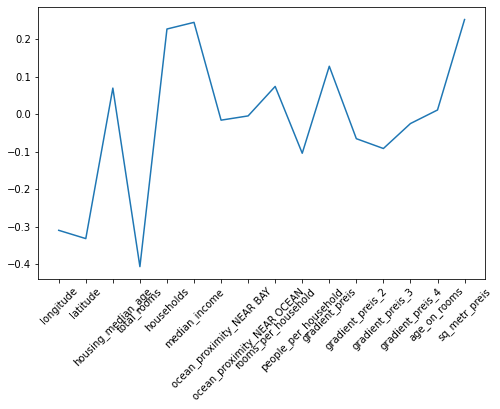

In [35]:

fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(reg.coef_.ravel())
plt.xticks(np.arange(x_test.shape[1]),
           df_train.drop(columns='median_house_value').columns, rotation=45)
plt.show()

Оцениваем степень важности (влияния) коэффициента

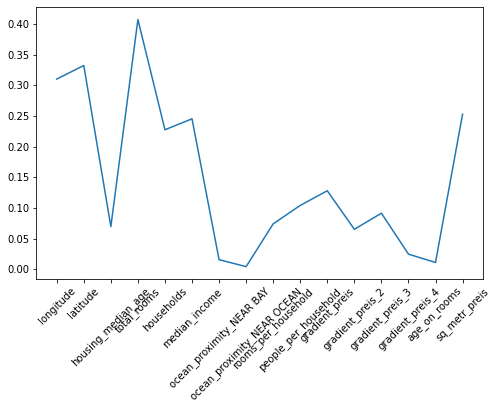

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(abs(reg.coef_.ravel()))
plt.xticks(np.arange(x_test.shape[1]),
           df_train.drop(columns='median_house_value').columns, rotation=45)
plt.show()

In [37]:
reg.coef_

array([-0.3101174 , -0.33224787,  0.06974136, -0.40713031,  0.22759028,
        0.24535697, -0.01586539, -0.00452141,  0.07425541, -0.10425281,
        0.12813598, -0.06536635, -0.0915969 , -0.02491575,  0.01128526,
        0.25288348])

### Model Evaluation

Вычисляем метрики

In [38]:
from sklearn.metrics import mean_squared_error

pred_train = reg.predict(x_train)

np.sqrt(mean_squared_error(np.exp(pred_train), np.exp(y_train)))

67853.50253329384

In [39]:
pred_test = reg.predict(x_test)


np.sqrt(mean_squared_error(np.exp(pred_test), np.exp(y_test)))
#reg.score(pred_train, y_train)

64424.00143610651

Важны не только числа, но и характер распределения

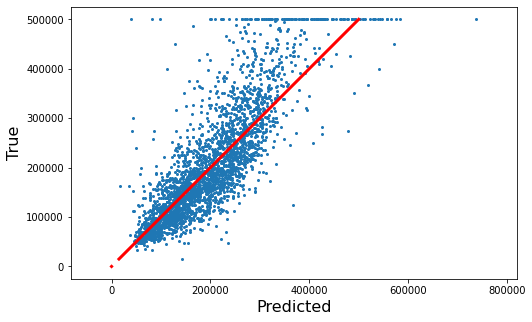

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
plt.scatter(np.exp(pred_test), np.exp(y_test), s=4)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('True', fontsize=16)
plt.axis('equal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='r', lw=3)
plt.plot([np.exp(y_test.min()), np.exp(y_test.max())], [np.exp(y_test.min()), np.exp(y_test.max())], c='r', lw=3)
plt.show()

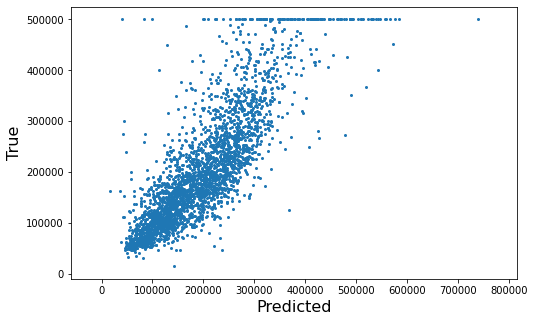

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
plt.scatter(np.exp(pred_test), np.exp(y_test), s=4)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('True', fontsize=16)
plt.axis('equal')
plt.show()

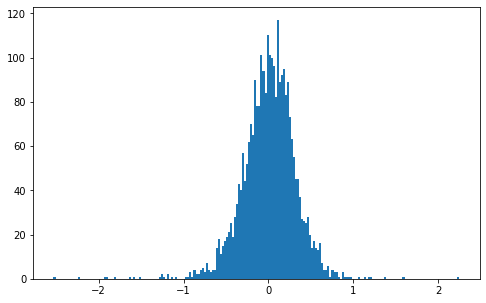

In [42]:
fig = plt.figure(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
err = (pred_test - y_test)
c=np.clip(err, -1e6, 1e6)
plt.hist(c, bins=200)
plt.show()

Поиск факторов, которые влияют на ошибку

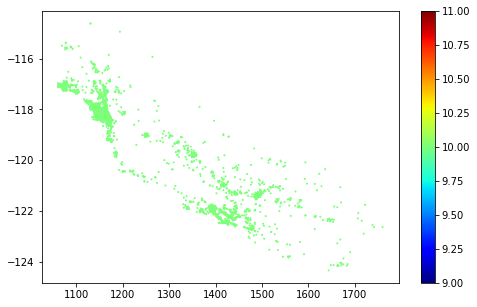

In [43]:
fig = plt.figure(figsize=(8, 5))
fig.patch.set_facecolor('xkcd:white')
#err = np.sqrt((np.exp(pred_test) -np.exp(y_test))**2)
err = df_test['total_rooms']
plt.scatter(df_test.latitude, df_test.longitude, c=np.clip(err, 0, 10),
            cmap="jet", s=1)
plt.colorbar()
plt.show()

Более устойчивый вариант оценки модели - cross-validation

In [44]:
from sklearn.model_selection import cross_val_score

x = scaler.transform(df.drop(columns='median_house_value'))
y = df['median_house_value'].values
reg = LinearRegression()
cv = cross_val_score(reg, x, y, cv=5, scoring='neg_root_mean_squared_error')
-cv

array([0.30505638, 0.32032112, 0.3068829 , 0.32329818, 0.32557406])

In [45]:
np.mean(-cv)

0.3162265288755638

Базовая модель получена. Дальше начинается работа по улучшению метрик.